<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 90px">

# Experimental Design

<br><br>

In this notebook, we'll
* Randomly assign experimental units to treatments and conduct an "experiment"
* Explore the results of the "experiment" using EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/example.csv")
df.head()

,uid,block
0,1,2
1,2,1
2,3,2
3,4,1
4,5,2


## Treatment Allocation into 3 Treatments (no blocking)
This is commonly done by generating random numbers and sorting them.

In [3]:
# Set seed
np.random.seed(2022)

# Assign a column of random numbers
df['rnd'] = np.random.rand(df.shape[0])
df.head()

,uid,block,rnd
0,1,2,0.009359
1,2,1,0.499058
2,3,2,0.113384
3,4,1,0.049974
4,5,2,0.685408


In [4]:
# Sort by the random numbers
# (actually not necessary, but common practice)
df.sort_values(by='rnd', inplace=True)
df.head()

,uid,block,rnd
0,1,2,0.009359
24,25,1,0.018664
3,4,1,0.049974
19,20,2,0.096433
2,3,2,0.113384


In [5]:
# Get their orderings via ".rank()"
df['rank'] = df['rnd'].rank().astype(int)
df.head()

,uid,block,rnd,rank
0,1,2,0.009359,1
24,25,1,0.018664,2
3,4,1,0.049974,3
19,20,2,0.096433,4
2,3,2,0.113384,5


In [11]:
# Neat trick to get intervals of length 10 using floor division
df['rank'] // (30//3)

0     0
24    0
3     0
19    0
2     0
28    0
21    0
22    0
16    0
14    1
27    1
29    1
5     1
15    1
1     1
25    1
17    1
7     1
4     1
9     2
20    2
23    2
11    2
10    2
12    2
26    2
8     2
6     2
13    2
18    3
Name: rank, dtype: int64

In [14]:
df['trt'] = ((df['rank'] -1))  // (df.shape[0]//3)
df.head()

,uid,block,rnd,rank,trt
0,1,2,0.009359,1,0
24,25,1,0.018664,2,0
3,4,1,0.049974,3,0
19,20,2,0.096433,4,0
2,3,2,0.113384,5,0


In [15]:
# Remap them to the true treatment name
trt_dict = {0:'A', 1:'B', 2:'C'}
df['trt'] = df['trt'].map(trt_dict)
df.head()

,uid,block,rnd,rank,trt
0,1,2,0.009359,1,A
24,25,1,0.018664,2,A
3,4,1,0.049974,3,A
19,20,2,0.096433,4,A
2,3,2,0.113384,5,A


## Experimental EDA

In [16]:
from experiment import conduct_experiment

In [17]:
# Conduct the "experiment"
df = conduct_experiment(df)
df.head()

,uid,block,rnd,rank,trt,value
0,1,2,0.009359,1,A,113.518782
24,25,1,0.018664,2,A,121.378310
3,4,1,0.049974,3,A,130.131723
19,20,2,0.096433,4,A,112.559891
2,3,2,0.113384,5,A,112.560055


In [18]:
# Mean values of each treatment?
df.groupby(by='trt')[['value']].mean()

,value
trt,
A,118.421904
B,80.290545
C,99.737084


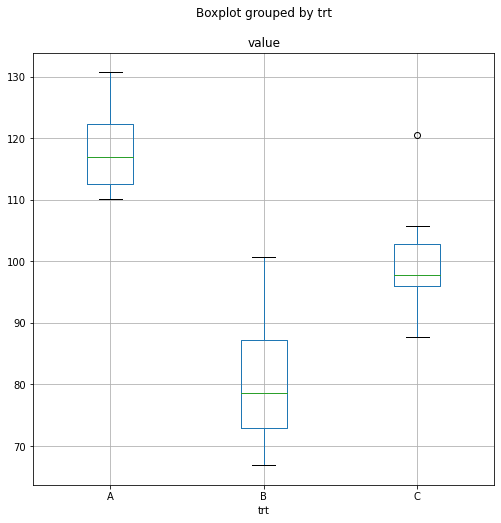

In [23]:
# Boxplot - do you think these treatments had an impact on resulting value?
df.boxplot(column='value', by='trt', figsize=(8, 8));

## (BONUS) Treatment Allocation into 3 Treatments (With Blocking)

In [24]:
df = pd.read_csv("data/example.csv")

In [26]:
def assign_ranks(grp):
    n_rows = grp.shape[0]
    grp["rank"] = grp["rnd"].rank()
    grp["trt"] = (grp["rank"] - 1).astype(int) // (n_rows / 3)
    grp["trt"] = grp["trt"].map({0: 'A', 1: 'B', 2: 'C'})
    return grp

In [27]:
df["rnd"] = np.random.rand(df.shape[0])
df = df.groupby("block").apply(assign_ranks)

In [28]:
pd.crosstab(df.trt, df.block)

block,1,2
trt,,
A,5,6
B,4,6
C,4,5
